In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 

In [ ]:
df=pd.read_csv('/content/Data Science Jobs Salaries (1).csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


In [ ]:
df['work_year'].unique().tolist()[0][:]

'2021e'

In [ ]:
def fix_year (y):
    if y.endswith('e'):
        return (y[:-1])
    else:
        return (y[:])
    

  
df['work_year']=df['work_year'].apply(fix_year)


In [ ]:
df['work_year'].unique().tolist()

['2021', '2020']

In [ ]:
df['work_year']=pd.to_datetime(df['work_year'],format='%Y',errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           245 non-null    datetime64[ns]
 1   experience_level    245 non-null    object        
 2   employment_type     245 non-null    object        
 3   job_title           245 non-null    object        
 4   salary              245 non-null    int64         
 5   salary_currency     245 non-null    object        
 6   salary_in_usd       245 non-null    int64         
 7   employee_residence  245 non-null    object        
 8   remote_ratio        245 non-null    int64         
 9   company_location    245 non-null    object        
 10  company_size        245 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 21.2+ KB


In [ ]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.describe()

,salary,salary_in_usd,remote_ratio
count,2.450000e+02,245.000000,245.000000
mean,5.025418e+05,99868.012245,69.183673
std,2.276230e+06,83983.326949,37.593421
min,4.000000e+03,2876.000000,0.000000
25%,6.000000e+04,45896.000000,50.000000
50%,1.030000e+05,81000.000000,100.000000
75%,1.740000e+05,130000.000000,100.000000
max,3.040000e+07,600000.000000,100.000000


In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021-01-01,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020-01-01,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021-01-01,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021-01-01,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021-01-01,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020-01-01,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021-01-01,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020-01-01,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020-01-01,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
df.groupby(df['salary_currency']).describe()['salary_in_usd']

,count,mean,std,min,25%,50%,75%,max
salary_currency,,,,,,,,
BRL,2.0,16026.000000,4279.410240,13000.0,14513.00,16026.0,17539.00,19052.0
CAD,10.0,96996.900000,38463.170062,54376.0,72967.50,92159.0,102954.50,187917.0
CLP,1.0,40798.000000,NaN,40798.0,40798.00,40798.0,40798.00,40798.0
CNY,1.0,43331.000000,NaN,43331.0,43331.00,43331.0,43331.00,43331.0
DKK,2.0,37373.000000,12053.342192,28850.0,33111.50,37373.0,41634.50,45896.0
EUR,57.0,67260.771930,33038.878733,15966.0,45773.00,62726.0,79833.00,175228.0
GBP,13.0,86447.076923,23669.136058,51814.0,66400.00,83000.0,109024.00,117583.0
HUF,2.0,36233.500000,704.985461,35735.0,35984.25,36233.5,36482.75,36732.0
INR,21.0,26353.095238,22638.730510,5423.0,6072.00,21695.0,30509.00,94917.0


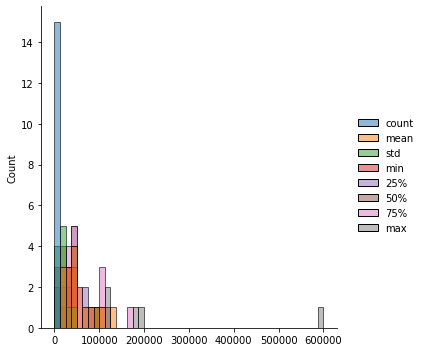

In [ ]:
sns.displot(df.groupby(df['salary_currency']).describe()['salary_in_usd'])

In [ ]:
df.drop(['salary_currency'],axis=1)

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021-01-01,EN,FT,Data Science Consultant,54000,64369,DE,50,DE,L
1,2020-01-01,SE,FT,Data Scientist,60000,68428,GR,100,US,L
2,2021-01-01,EX,FT,Head of Data Science,85000,85000,RU,0,RU,M
3,2021-01-01,EX,FT,Head of Data,230000,230000,RU,50,RU,L
4,2021-01-01,EN,FT,Machine Learning Engineer,125000,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...
240,2020-01-01,SE,FT,Data Scientist,412000,412000,US,100,US,L
241,2021-01-01,MI,FT,Principal Data Scientist,151000,151000,US,100,US,L
242,2020-01-01,EN,FT,Data Scientist,105000,105000,US,100,US,S
243,2020-01-01,EN,CT,Business Data Analyst,100000,100000,US,100,US,L


In [ ]:
df.groupby(df['experience_level']).describe()['salary_in_usd']

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,54.0,59753.462963,49103.427811,4000.0,21732.25,58800.5,82500.0,250000.0
EX,11.0,226288.000000,164029.405584,70329.0,114021.50,154963.0,280000.0,600000.0
MI,103.0,85738.135922,78324.468318,2876.0,40505.00,73000.0,110000.0,450000.0
SE,77.0,128841.298701,67909.763752,19052.0,78340.00,120000.0,170000.0,412000.0


In [ ]:
df.groupby(df['job_title']).describe()['salary_in_usd']

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
3D Computer Vision Researcher,1.0,5423.000000,NaN,5423.0,5423.00,5423.0,5423.00,5423.0
AI Scientist,5.0,28599.600000,20355.832206,12000.0,12000.00,18102.0,45896.00,55000.0
Applied Data Scientist,1.0,54376.000000,NaN,54376.0,54376.00,54376.0,54376.00,54376.0
Applied Machine Learning Scientist,1.0,423000.000000,NaN,423000.0,423000.00,423000.0,423000.00,423000.0
BI Data Analyst,5.0,78800.800000,55882.419876,9272.0,36732.00,98000.0,100000.00,150000.0
Big Data Architect,1.0,99956.000000,NaN,99956.0,99956.00,99956.0,99956.00,99956.0
Big Data Engineer,6.0,47651.833333,49812.194392,5898.0,16703.25,20335.5,87435.75,114047.0
Business Data Analyst,3.0,98200.333333,37731.702855,59601.0,79800.50,100000.0,117500.00,135000.0
Cloud Data Engineer,2.0,124757.000000,49841.128579,89514.0,107135.50,124757.0,142378.50,160000.0


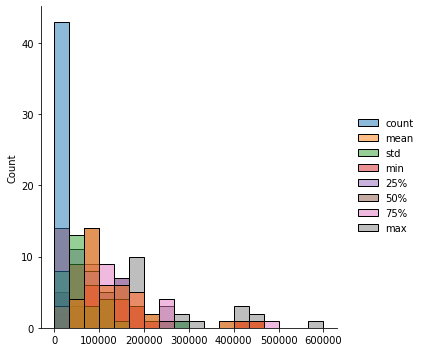

In [ ]:
sns.displot(df.groupby(df['job_title']).describe()['salary_in_usd'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           245 non-null    datetime64[ns]
 1   experience_level    245 non-null    object        
 2   employment_type     245 non-null    object        
 3   job_title           245 non-null    object        
 4   salary              245 non-null    int64         
 5   salary_currency     245 non-null    object        
 6   salary_in_usd       245 non-null    int64         
 7   employee_residence  245 non-null    object        
 8   remote_ratio        245 non-null    int64         
 9   company_location    245 non-null    object        
 10  company_size        245 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 21.2+ KB


In [ ]:
df.groupby(df['work_year']).sum()['salary_in_usd']

work_year
2020-01-01     6528119
2021-01-01    17939544
Name: salary_in_usd, dtype: int64

In [ ]:
df.groupby(df['work_year']).describe()['salary_in_usd']

,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020-01-01,66.0,98910.893939,85435.690889,5707.0,45653.5,79833.0,117250.0,450000.0
2021-01-01,179.0,100220.916201,83680.979583,2876.0,47442.5,83000.0,140000.0,600000.0


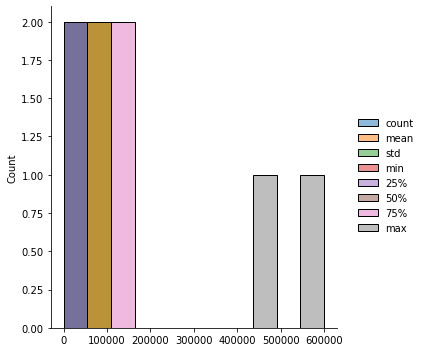

In [ ]:
sns.displot(df.groupby(df['work_year']).describe()['salary_in_usd'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           245 non-null    datetime64[ns]
 1   experience_level    245 non-null    object        
 2   employment_type     245 non-null    object        
 3   job_title           245 non-null    object        
 4   salary              245 non-null    int64         
 5   salary_currency     245 non-null    object        
 6   salary_in_usd       245 non-null    int64         
 7   employee_residence  245 non-null    object        
 8   remote_ratio        245 non-null    int64         
 9   company_location    245 non-null    object        
 10  company_size        245 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 21.2+ KB


In [ ]:
clean=pd.get_dummies(df,columns=['experience_level','employment_type','job_title','employee_residence','company_location' ,'company_size'],drop_first=True)

In [ ]:
x=clean.drop(['salary_in_usd','work_year','salary_currency'],axis=1)

y=clean['salary_in_usd']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


models = {
    'LR': LinearRegression(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor()
}


for name, model in models.items():
    print(f"Model: {name}")
    print("-"*20)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
    print(f"Train R2: {r2_score(y_train, y_pred_train)}")
    print(f"Test R2: {r2_score(y_test, y_pred_test)}")
    print("\n")

Model: LR
--------------------
Train MAE: 15278.873926564509
Test MAE: 56204.14991923129
Train RMSE: 27797.708563438886
Test RMSE: 90387.07458214671
Train R2: 0.8757650426339548
Test R2: 0.2003251104358692


Model: SVM
--------------------
Train MAE: 55679.171761689635
Test MAE: 55905.12540974766
Train RMSE: 81074.96382371332
Test RMSE: 104017.42834090907
Train R2: -0.05681592174874073
Test R2: -0.05904160707361861


Model: KNN
--------------------
Train MAE: 21410.059183673467
Test MAE: 32809.99183673469
Train RMSE: 50394.10535014619
Test RMSE: 81340.41733084431
Train R2: 0.5916944345898737
Test R2: 0.3523899337780976


Model: DT
--------------------
Train MAE: 0.0
Test MAE: 14655.102040816326
Train RMSE: 0.0
Test RMSE: 42351.873272306024
Train R2: 1.0
Test R2: 0.8244317230479518


Model: RF
--------------------
Train MAE: 4394.226122448979
Test MAE: 14011.535918367346
Train RMSE: 9197.838302620352
Test RMSE: 38179.14835301103
Train R2: 0.9863981694111923
Test R2: 0.8573232292900766

